## Springboard Data Science Intensive Capstone Project
***
In recent years, high-throughput screening has been used in the exploratory phase of the drug discovery process.At
this stage, thousands of small molecule compounds are tested for inhibitory capability against a biological target 
in order to find a lead target molecule.  Any molecule found to be inhibiting a biological function is further 
optimized to be more potent.  Also, at this period, a structure-activity relationship diagram can be developed 
in which molecules having the same scaffold are analyzed for degrees of affect based on physical characteristics.  
The objective of this analysis is to reveal hidden patterns, trends or relationships between intrinsic properties 
of the molecule and effectiveness in inhibiting the ATPase activity of the helicase protein.  This project provided 
me with an opportunity to explore my experimental data using a proper data science methodology of data wrangling, 
data analysis, data visualization, prediction, and data storytelling.  Also please note that there are proprietary
software one can use to run PCA analysis on screening data.

### Data Source

The initial data was converted to an excel spreadsheet file by the microplate reader machine used for screening.  
I further merged it with the molecule file that came from the vendor which contains molecular information such as 
SMILES (1D chemical representation).  I then imported it to Instant Jchem software.   This software further calculated
molecular descriptors based on the chemical structure, such as LogP, LogD, number of H bond donors, number of Hydrogen 
bond acceptors, number of Rotatable bonds, and whether it satisfies Lipinski’s Rule of 5.

The dataset used for this project was the result of combining assay results of different compound libraries
used for a Dengue Virus and Hepatitis C Virus high throughput screening. It is currently in a csv format and
has the following layout:
    
###### CdId (Compound ID)
###### MolWeight (Molecular Weight - mass of one mole of molecule)
###### MolFormula (Molecular Formula - formula giving the number of atoms of each of the element present in molecule)
###### LotNumber (Lot Number - ID number assigned to a particular lot of material)
###### DaughterPlate (Daughter Plate - plate ID where the molecule resides)
###### PlateMap (Plate Map - plate reference where compound is located)
###### PercentPurity (Percent Purity - measure of lack of impurities in compound)
###### HCVHDAInh (HCV HDA Inhibition - percent inhibition exhibited by compound targeting helicase activity)
###### DENVATPaseInh (DENV ATPase Inhibition - percent inhibition exhibited by compound targeting helicase activity)
###### IUPACName (IUPAC Name - compound name as recommended by International Union of Pure and Applied Chemistry)
###### SMILES (Simplified Molecular Input Line Entry System - describes structure of compound using short ASCII strings)
###### LogP (Partition coefficient of a molecule between an aqueous and lipophilic phases - can help predict drug-likeness)
###### LogD (Distribution constant of lipophilicity of molecule - can help predict drug-likeness)
###### HBondDonors (Hydrogen Bond Donors - atom to which hydrogen is covalently bonded in a hydrogen bond)
###### HBondAcceptors (Hydrogen Bond Acceptors - neighborng electronegative ion or molecule in a hydrogen bond)
###### RotatableBonds (Rotatable Bonds - any single bond not in a ring which allow free rotation)
###### LipinskiRuleof5 (Lipinski Rule of 5 - rule of thumb to evaluate drug likeness or if a compound will likely be orally active drug in humans.)

Initially, I wanted to create some plots that will answer the following questions:
1) Since the dataset contain two columns that describe the Hepatitis C and Dengue Virus %Inhibition,
   plot them side by side to visually see if there's any that is more potent as an HCV inhibitor and vice versa.
3) Does the number of rotatable bonds or number of hydrogen bond donors or number of hysrogwn bond acceptors or
   lypophilicity index affect the degree of inhibition of the compound for the Dengue virus? 
4) What is the correlation between the intrinsic properties of a compound and its ability to inhibit the virus's helicase activity?

### Data Visualization
   Some basic plots are listed below that show the trends and correlations between molecular
 descriptors and inhibitory capability. To conclude, we learn that 1) most of the compounds in this
 assay had poor inhibition against the helicase protein of both Hepatitis C and Dengue Virus and
 2) a lower number of hydrogen bond donors correlate with a higher inhibition rate against the DENV helicase
 but the number of rotatable bonds do not.

    

In [1]:

# Import all the libraries
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set-up matplotlib style
plt.style.use('fivethirtyeight')

# Load data
dataHTS = pd.read_excel('data/DENV_HTS_Data.xlsx', encoding='latin-1')
dataHTS.head(10)


,CdId,MolWeight,MolFormula,LotNumber,DaughterPlate,PlateMap,PercentPurity,HCVHDAInh,DENVATPaseInh,IUPACName,SMILES,LogP,LogD,HBondDonors,HBondAcceptors,RotatableBonds,LipinskiRuleof5
0,1,395.60,C25H33NOS,PSL-8-168-K2A4T,KUP100787,A03,100.00,-0.66,-5.87,(5R)-5-tert-butyl-1-[(3S)-3-phenyl-3-(phenylsu...,CC(C)(C)[C@H]1CCN(CC[C@H](Sc2ccccc2)c2ccccc2)C...,5.92,5.92,0,1,7,False
1,2,568.71,C32H28N2O4S2,CMC-32-2-A16,KUP100787,A04,92.41,-5.61,-12.12,"(2R,4R)-3-(benzenesulfonyl)-4-ethenyl-6-methyl...",Cc1ccc(cc1)S(=O)(=O)N1[C@H](c2ccccc2)C(C#N)([C...,6.96,6.96,0,5,5,False
2,3,298.40,C14H22N2O3S,CL-COB1-35-a,KUP100787,A05,100.00,-7.59,-5.91,"propyl (6R,7R)-3-methyl-8-oxo-7-(propylamino)-...",CCCN[C@H]1[C@H]2SCC(C)=C(N2C1=O)C(=O)OCCC,1.86,1.24,1,3,7,True
3,4,410.33,C18H20BrNO3S,PRH-AZ-059,KUP100787,A06,99.17,-3.63,-6.93,N-[(2-bromophenyl)methyl]-N-[(2S)-1-hydroxy-3-...,OC[C@H](Cc1ccccc1)N(Cc1ccccc1Br)S(=O)(=O)C=C,3.52,3.52,1,3,7,True
4,5,407.45,C18H24F3NO4S,PSL4-1-340-10,KUP100787,A07,99.00,-8.58,-11.89,"2-[(3S)-2-octyl-1,1-dioxo-6-(trifluoromethyl)-...",CCCCCCCCN1[C@@H](CC(O)=O)c2ccc(cc2S1(=O)=O)C(F...,4.53,1.32,1,4,10,True
5,6,440.53,C28H28N2O3,CMC-33-121,KUP100787,A08,98.70,-3.63,-1.87,"ethyl (6aR,11aS)-6-benzyl-9-(dimethylamino)-5-...",[H][C@]12N(Cc3ccccc3)C(=O)c3ccccc3[C@]1(Cc1cc(...,4.97,4.97,0,3,6,True
6,7,515.56,C28H22FN3O4S,CMC-32-2-A21,KUP100787,A09,99.44,-4.62,-1.41,"methyl 4-[(2R,4S)-3,3-dicyano-4-ethenyl-5-fluo...",COC(=O)c1ccc(cc1)[C@H]1N(c2cccc(F)c2[C@@H](C=C...,5.28,5.28,0,5,5,False
7,8,426.55,C25H34N2O4,CMC-1-281-1A6,KUP100787,A10,100.00,-9.57,2.87,"(4aS,8R,8aS)-N-cyclohexyl-2-[(3,4-dimethoxyphe...",[H][C@@]12CCN(Cc3ccc(OC)c(OC)c3)C(=O)[C@]1([H]...,2.83,2.83,1,4,6,True
8,9,377.38,C16H18F3NO4S,PSL4-1-338-5,KUP100787,A11,94.60,-10.56,-8.05,"2-[(3S)-2-cyclohexyl-1,1-dioxo-5-(trifluoromet...",OC(=O)C[C@@H]1N(C2CCCCC2)S(=O)(=O)c2ccc(cc12)C...,3.23,0.04,1,4,4,True
9,10,507.53,C27H20F3N3O2S,CMC-32-2-A8,KUP100787,A12,98.90,-11.55,-8.05,"(2R,4R)-4-ethenyl-1-(4-methylbenzenesulfonyl)-...",Cc1ccc(cc1)S(=O)(=O)N1[C@H](c2ccccc2C(F)(F)F)C...,6.01,6.01,0,4,4,False


#### There are only 2 experimental variables here, the rest are descriptors.  In the next few cells, I'd like to visualize the data by using some standard 1D and 2D graphs.


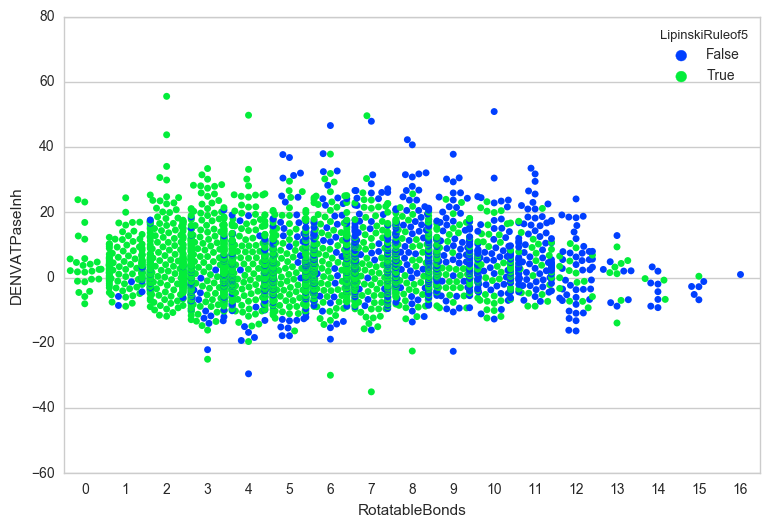

In [2]:
# First, I'd like to see a representation of the distribution of values.
# Does the number of rotatable bonds influence the percent inhibition
# exhibited by the molecule?

sns.set(style="whitegrid", palette="bright", color_codes=True)

# "Melt" the dataset to "long-form" or "tidy" representation
DENV = pd.melt(dataHTS, "RotatableBonds", var_name="LipinskiRuleof5")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="RotatableBonds", y="DENVATPaseInh", hue="LipinskiRuleof5", data=dataHTS)

#### From this swarmplot, we can't make a categorical conclusion that the number of rotatable bonds can influence the percent inhibition of the molecule in this particular assay.  Case in point, a molecule with 2 rotable bonds had about 58% inhibition but also another molecule with 10 rotable bonds had about 55% inhibition.  So clearly, we can't say that a lower number of rotatable bonds can lead to higher inhibition by the molecule.

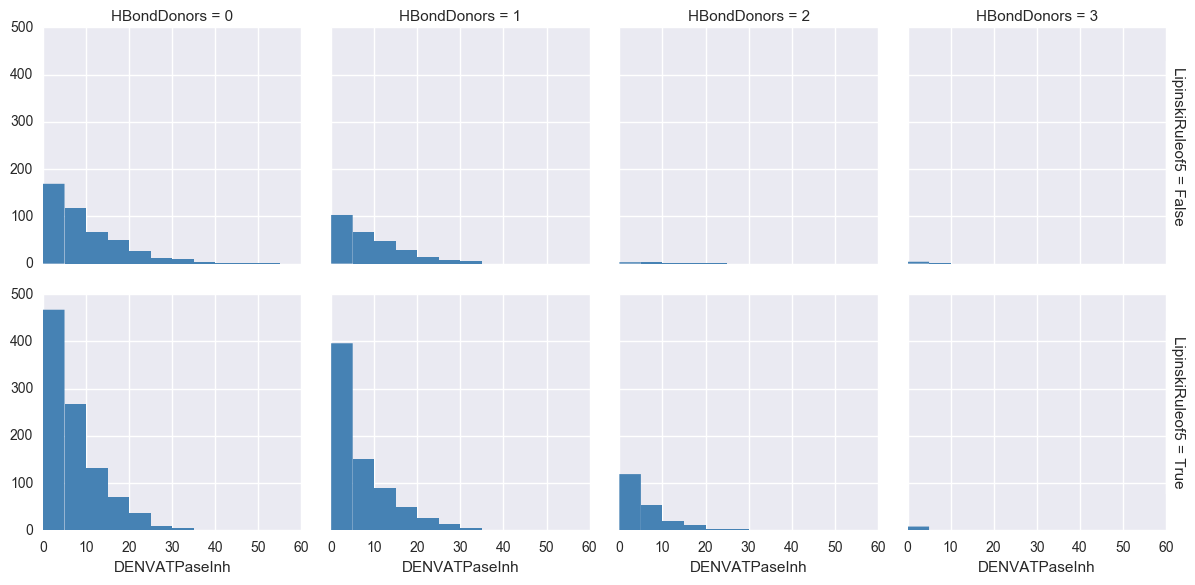

In [3]:
# Next, I'd like to find out whether a molecule's number of hydrogen bond donors
# affect the ability of the molecule to pass the Lipinski Rule of 5 and also
# influence its degree of inhibition for the helicase activity in this dengue assay.

sns.set(style="darkgrid")

g = sns.FacetGrid(dataHTS, row="LipinskiRuleof5", col="HBondDonors", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "DENVATPaseInh", color="steelblue", bins=bins, lw=0)

#### In the graph above, we can deduce that the lower the number of hydrogen bond donors a molecule has the higher chance it has of inhibiting the Dengue virus helicase acitivity and also in satisfying the Lipinski Rule of 5.

C:\Users\Noreena\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


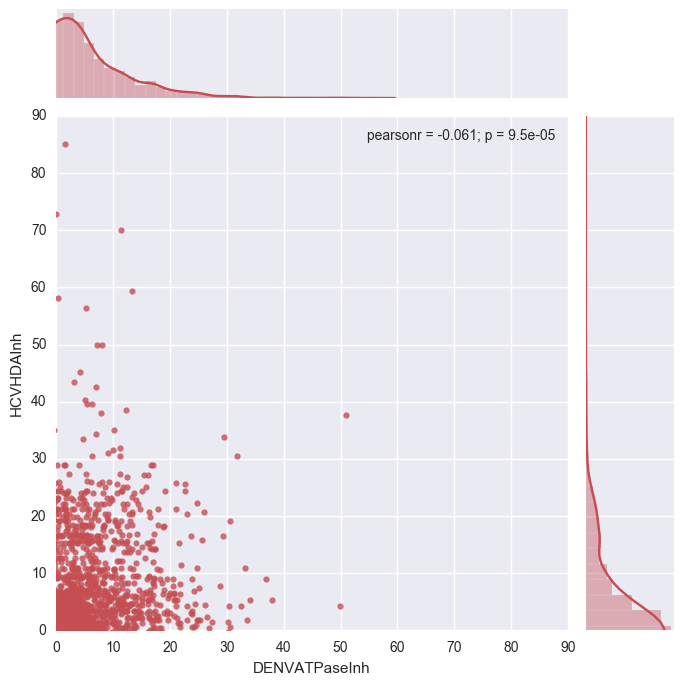

In [4]:
# Next, create a jointplot to determine whether the small molecule/compound
# is effective in inhibiting the helicase protein's activity of either 
# Hepatitis C or Dengue viruses.

sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("DENVATPaseInh", "HCVHDAInh", data=dataHTS, kind="reg",
                  xlim=(0, 90), ylim=(0, 90), color="r", size=7)

#### It's interesting to know that most of the compounds screened were ineffective in stopping the helicase activity of HCV and Dengue, having a percent inhibition less than 40%.  However, there are a few molecules that are effective against HCV helicase but not Dengue and vice versa.

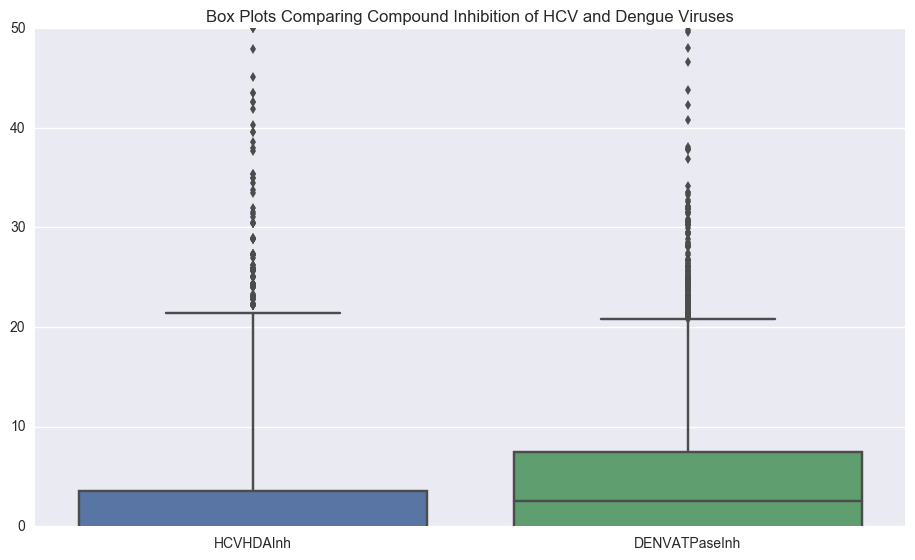

In [5]:
# Now, let's see if a better summarization of the disribution of inhibition is displayed
# by a box and whisker plot. First let's create a new dataframe with just the inhibition
# data for both HCV and Dengue.

dataHTS_boxplot = dataHTS[['HCVHDAInh','DENVATPaseInh']].copy()

# Set the width and height of the box plot.
plt.figure(figsize=(10,6))

# Limit the range of the y-axis.  This is helpful because we have a lot of outliers.
plt.ylim(0,50)
plt.title('Box Plots Comparing Compound Inhibition of HCV and Dengue Viruses')
sns.boxplot(data=dataHTS_boxplot)


#### Boxplots display a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of the spread of the middle 50% of the data.)

#### We can see that HCV inhibition is skewed towards smaller values compared to Dengue inhibition.

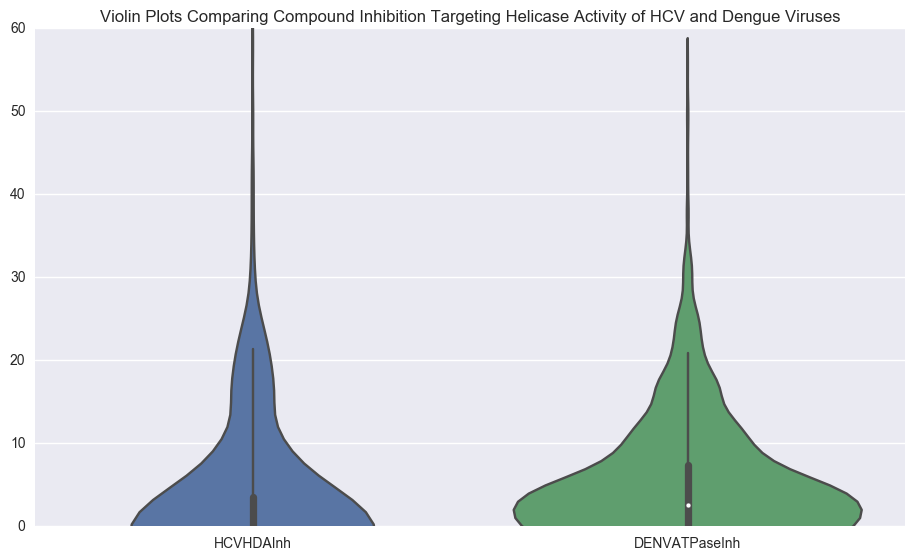

In [6]:
# Now show a violin plot comparing the assay results of the compounds against
# HCV and dengue virus helicase.  Same data as above is used.
plt.figure(figsize=(10,6)) 
plt.ylim(0,60)
plt.title('Violin Plots Comparing Compound Inhibition Targeting Helicase Activity of HCV and Dengue Viruses')
sns.violinplot(data=dataHTS_boxplot)

#### Violin plots can show more information than box plots when the data has a bimodal distribution. In this case, we don't see that, although we can easily visualize that the Dengue Percent Inhibition has a wider range of values.
#### Next, I want to use a machine learning algorithm, especifically linear regression to make predictions. Using all the features that describe a molecule's characteristics, make a model to predict another molecule's ability to inhibit in the assay given their molecular descriptors.


In [7]:
# But first, let's find out the degree of correlation between intrinsic variables.  Correlation gives 
# an indication of how related the changes are between two variables.  If two varibles change
# in the same direction then they are positively correlated.  If they change in opposite directions together
# then they are negatively correlated.  The correlation of independent variables is useful to know since some
# machine learning algorithms such as linear and logistic regression can have poor performance if there are 
# highly correlated input variables in the data.

# But before running the correlation function, I'm going to drop some columns that I believe will not help
# predict another molecule's inhibitory capability.  These variables only describe some external characteristic
# and not an intrinsic property of the molecule.  These are compound ID, percent purity, molecular formula,
# lot number, daughter plate, plate map, IUPAC name, and SMILES.

# Drop some variables because they describe external characteristics not intrinsic properties.
# Also, at this point I just want to concentrate on Dengue virus inhibition so I'll also drop
# the column about the HCV assay result.
dataHTSmodel = dataHTS.drop(['CdId','PercentPurity','IUPACName','MolFormula','LotNumber','DaughterPlate','PlateMap','HCVHDAInh','SMILES'],1)
dataHTSmodel.head(10)

dataHTSmodelcorr = dataHTSmodel.corr()

# Let's take a look at the correlation table
dataHTSmodelcorr

,MolWeight,DENVATPaseInh,LogP,LogD,HBondDonors,HBondAcceptors,RotatableBonds,LipinskiRuleof5
MolWeight,1.000000,0.171692,0.437832,0.452327,-0.131516,0.598630,0.653331,-0.639780
DENVATPaseInh,0.171692,1.000000,0.023648,-0.003272,-0.011217,0.123974,0.049993,-0.094234
LogP,0.437832,0.023648,1.000000,0.929054,-0.027332,-0.275469,0.218185,-0.588596
LogD,0.452327,-0.003272,0.929054,1.000000,-0.073342,-0.255855,0.194420,-0.553056
HBondDonors,-0.131516,-0.011217,-0.027332,-0.073342,1.000000,-0.104690,0.011831,0.111699
HBondAcceptors,0.598630,0.123974,-0.275469,-0.255855,-0.104690,1.000000,0.501665,-0.229629
RotatableBonds,0.653331,0.049993,0.218185,0.194420,0.011831,0.501665,1.000000,-0.417868
LipinskiRuleof5,-0.639780,-0.094234,-0.588596,-0.553056,0.111699,-0.229629,-0.417868,1.000000


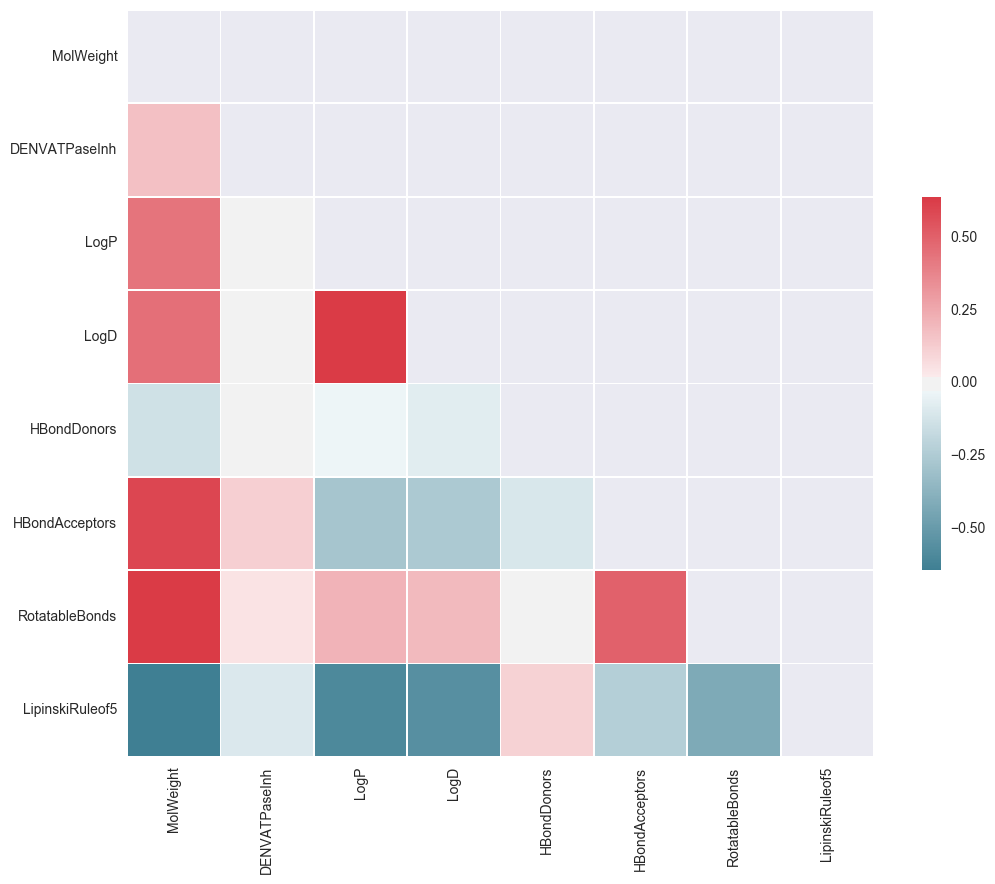

In [8]:

# An easier way to visualize this correlations plot is by a matrix plot.
# Generate a mask for the upper triangle.
mask = np.zeros_like(dataHTSmodelcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dataHTSmodelcorr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


#### There is a positive correlation between Lipinski Rule of 5, LogP and LogD with HBondDonors that either one of them can be taken out.

In [9]:

# LINEAR REGRESSION MODEL

# Now, I'd like to run a machine learning model against this data.  I'd start with
# Linear Regression since the experimental result can be used as the dependent variable.

# Y = Dengue Virus ATPase Percent Inhibition (called "target" data in python, and referred
#     to as the dependent variable or response variable)
# X = all the other features (or independent variables, predictors or explanatory variables)
#     which we will use to fit

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# This is code is based on the R modules.  It is just a preliminary run since I haven't
# split the dataset into testing and training sets.
m = ols('DENVATPaseInh ~ LogP + LogD + HBondDonors + HBondAcceptors + RotatableBonds + LipinskiRuleof5', dataHTS).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          DENVATPaseInh   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     19.23
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           3.24e-22
Time:                        10:48:32   Log-Likelihood:                -14409.
No. Observations:                4078   AIC:                         2.883e+04
Df Residuals:                    4071   BIC:                         2.888e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

In [10]:
# Now, I'd like to run the Python-based modules.
# Before training the model, make sure we can test it with unseen data to validate the 
# model for generalizability. There are different ways of doing train-test splits. 
# Let's use a random 70:30 split for training:testing.

# At this point, eventhough the correlation plot showed some positive correlation between
# variables, I won't drop any because I feel that they are not strong enough to warrant doing.

import sklearn
from sklearn.linear_model import LinearRegression

# Let's define our independent and dependent variables for regression
X = dataHTSmodel.iloc[:,3:9].values
Y = dataHTSmodel['DENVATPaseInh'].values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.30, random_state = 5)

# Display the number of rows and columns in our split data sets.
print(X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(2854, 5)
(1224, 5)
(2854,)
(1224,)


In [11]:
# Create an instance of the linear regression model.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lm = LinearRegression()

# Now, train the model with all the 6 predictors using the training set
lm.fit(X_train, Y_train)

# First, check to see how much of the variance in the training data is captured by the model.
# We can compute R-squared for this.
print ("R-squared: ")
print (r2_score(Y_train, lm.predict(X_train))) 
print

# Predict the output on the test set and print the first five values
print (lm.predict(X_test)[0:5])
print

# Look at the mean squared error on the test set first and then on the training set.
print ("Mean squared error on the test set: ")
print (mean_squared_error(Y_test, lm.predict(X_test)))
print ("Mean squared error on the training set: ")
print (mean_squared_error(Y_train, lm.predict(X_train)))

R-squared: 
0.0197505490208
[ 4.71770233  4.56101985  3.364459    1.9705111   3.93254085]
Mean squared error on the test set: 
69.8451111507
Mean squared error on the training set: 
68.7745856539


#### The linear regression model explains only 2.0% of the variance in the model. So, this indicates that the model is not a flexible one. Some of the linear relationships between the features and the dependent variable may have been lost. This is also quite clear from the high MSE values not just for the test set but also for the training set.

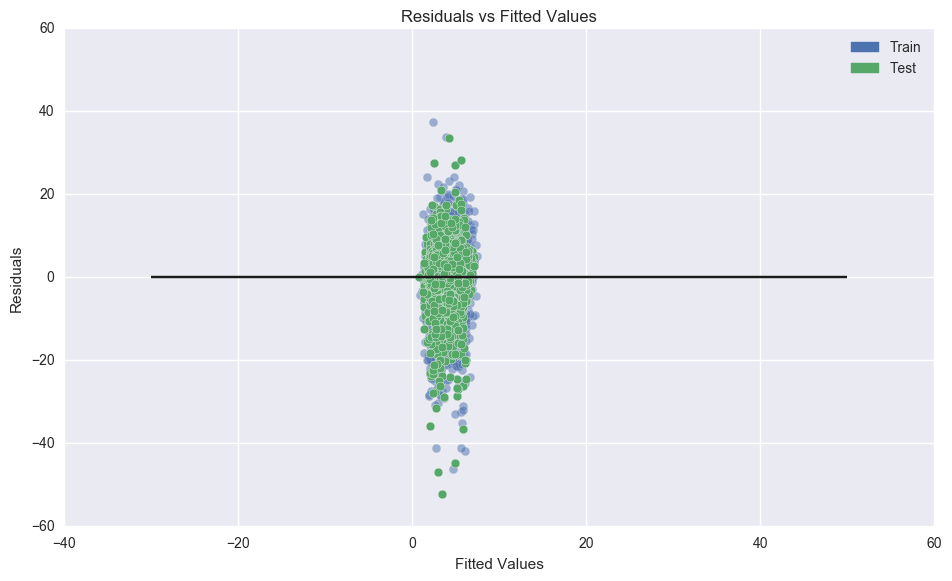

In [13]:
# Let's see if we have a homogeneity of variance between the independent variables and dependent variable.
# Plot the residuals vs. fitted values.

import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=-30, xmax = 50)

plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='b', label='Train')
green_patch = mpatches.Patch(color ='g', label='Test')
plt.legend(handles=[blue_patch, green_patch])


#### There does not appear to be a homogeneity of variance between the independent and dependent variables based on this residuals plot.  Clearly we don't have a linear relationship between the variables.

##### We need a more flexible/powerful model.  I'll try fitting a random forest model.

In [14]:
# RANDOM FOREST MODEL

# Create an instance of the Random Forest model.

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

# Now, train the model with all the 7 predictors in the training set
rf.fit(X_train, Y_train)

# Check to see how much of the variance in the training data is captured by the model.
# Compute R-squared for this (also referred to as the coefficient of determination).
print ("R-squared for training data: ")
print (rf.score(X_train,Y_train)) 
print
print ("R-squared for test data: ")
print (rf.score(X_test,Y_test)) 
print

# Predict the output on the test set and print the first five values
print ("Percent inhibition for succeeding molecules in the test set:")
print (rf.predict(X_test)[0:5])
print

# Look at the mean squared errors
from sklearn.metrics import mean_squared_error
print ("Mean squared error on the training set: ")
print (mean_squared_error(Y_train, rf.predict(X_train)))
print
print ("Mean squared error on the test set: ")
print (mean_squared_error(Y_test, rf.predict(X_test)))
print

R-squared for training data: 
0.72338761117
R-squared for test data: 
0.0348857155004
Percent inhibition for succeeding molecules in the test set:
[ 5.0905119   3.51013333  1.52279167 -0.984       0.4985    ]
Mean squared error on the training set: 
19.4072053899
Mean squared error on the test set: 
69.0958403717


<function print>

#### Please note that the random forest regression model explains 72.3% of the variance in the training data, which is a big improvement over the linear regression model. However, it performs poorly with the test data.
This is also quite clear from the improvement in the MSE value for just the training set: 19.4 with random forest. However, MSE value is much higher for the test set.
The model does not seem overfitted with the training data. Still, let's do some cross-validation so we can mitigate some overfitting if any.

In [15]:
# Let's do some cross-validation
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)

# import KFold from sklearn
from sklearn.cross_validation import KFold

# Split the dataset into 5 folds using the iterator
kf = KFold(len(X), n_folds=5)

# Now use the iterator to get indices of all 5 folds
# Initialize mse_test
mse_test = 0
for train_indices, test_indices in kf:
   
    # Fit a random forest model with all 6 predictors to the training set
    rf.fit(X[train_indices], Y[train_indices])
    results = rf.predict(X[test_indices])
    # Find the mean squared error of each split (test fold) and add it to the previous one
    mse_test = mse_test + mean_squared_error(Y[test_indices], rf.predict(X[test_indices]))
    
print ("Average mean squared error across all 5 folds is: ")
print (mse_test/5)

C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Average mean squared error across all 5 folds is: 
92.3008024094


#### Our results show that cross-validation does not help in reducing overall MSE. This indicates that there is something missing in the data with respect to salient features. 

In [19]:
# Now, I'd like to conduct a cluster analysis of the screening data.  I'd like to find out if
# there are distinct groups of characteristics in which the compounds are aggregating to.  By
# performing a silhouette analysis, we can study the separation distance between resulting clusters.

from sklearn.cluster import KMeans
import numpy as np

dataHTS_truncated = dataHTS.drop(dataHTS.columns[[0,1,2,3,4,5,6,9,10]], axis=1)

dataHTS_cols = np.matrix(dataHTS_truncated)

dataHTS_truncated.head(10)


,HCVHDAInh,DENVATPaseInh,LogP,LogD,HBondDonors,HBondAcceptors,RotatableBonds,LipinskiRuleof5
0,-0.66,-5.87,5.92,5.92,0,1,7,False
1,-5.61,-12.12,6.96,6.96,0,5,5,False
2,-7.59,-5.91,1.86,1.24,1,3,7,True
3,-3.63,-6.93,3.52,3.52,1,3,7,True
4,-8.58,-11.89,4.53,1.32,1,4,10,True
5,-3.63,-1.87,4.97,4.97,0,3,6,True
6,-4.62,-1.41,5.28,5.28,0,5,5,False
7,-9.57,2.87,2.83,2.83,1,4,6,True
8,-10.56,-8.05,3.23,0.04,1,4,4,True
9,-11.55,-8.05,6.01,6.01,0,4,4,False


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.290690017507


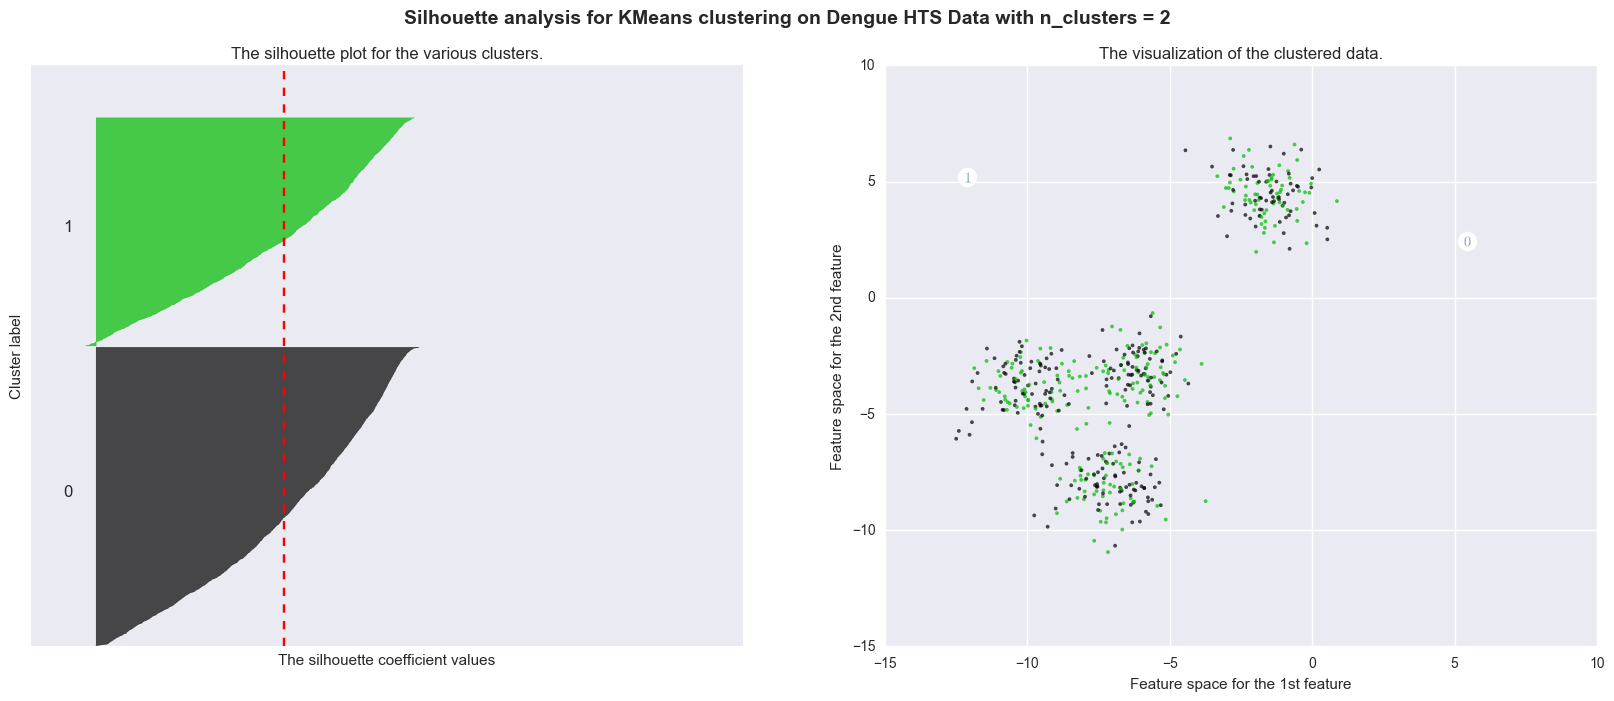

For n_clusters = 3 The average silhouette_score is : 0.319996598223


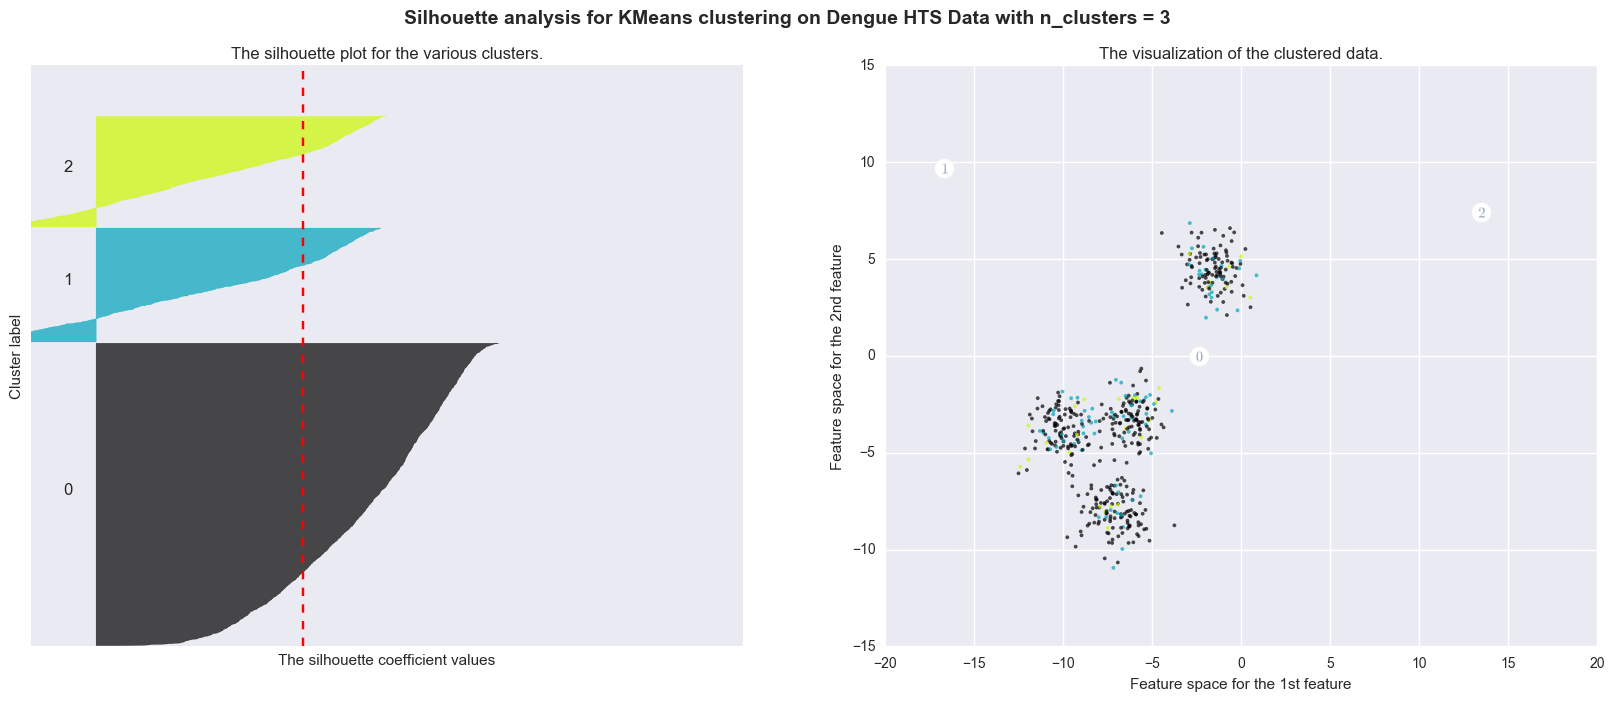

For n_clusters = 4 The average silhouette_score is : 0.341032051397


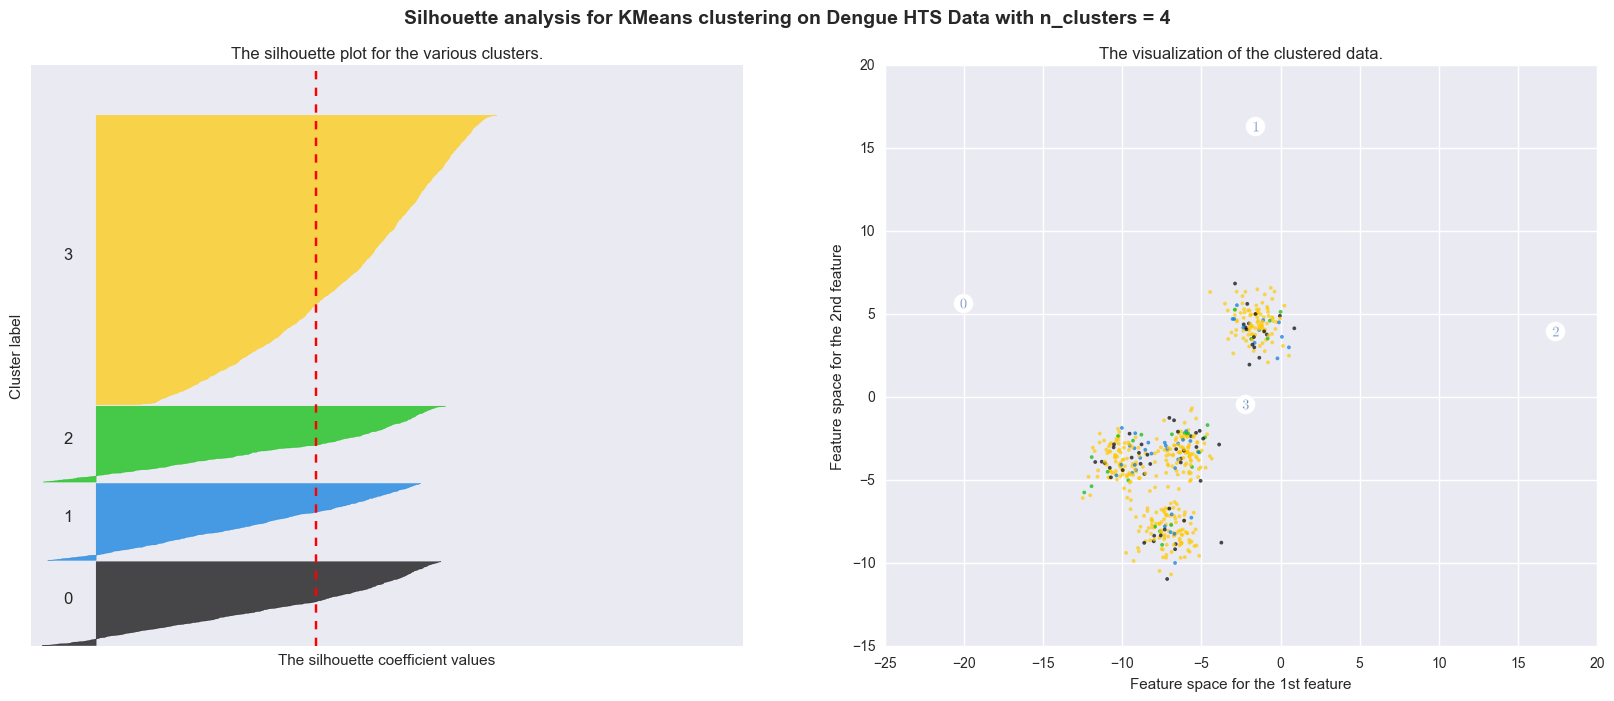

For n_clusters = 5 The average silhouette_score is : 0.275191756712


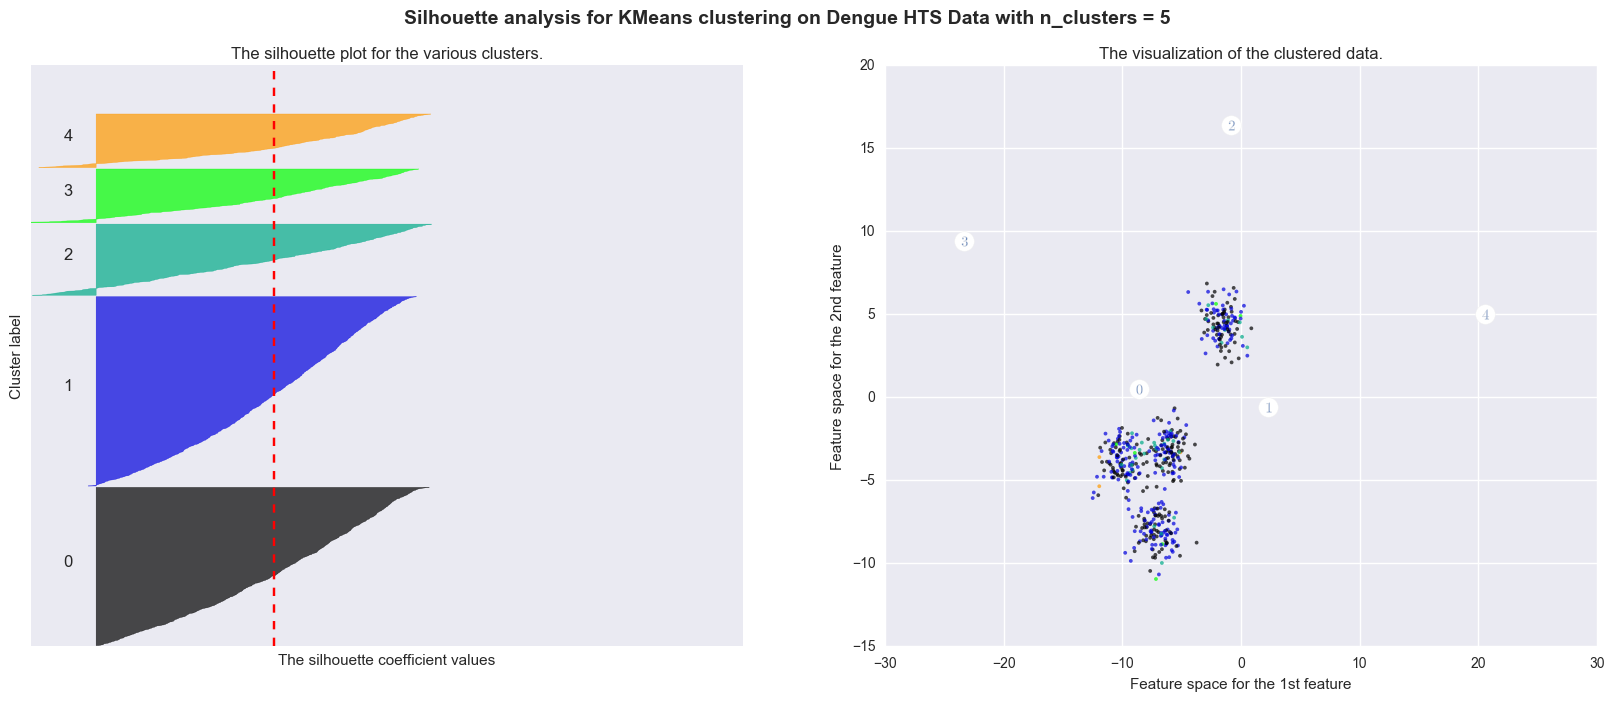

For n_clusters = 6 The average silhouette_score is : 0.253901302478


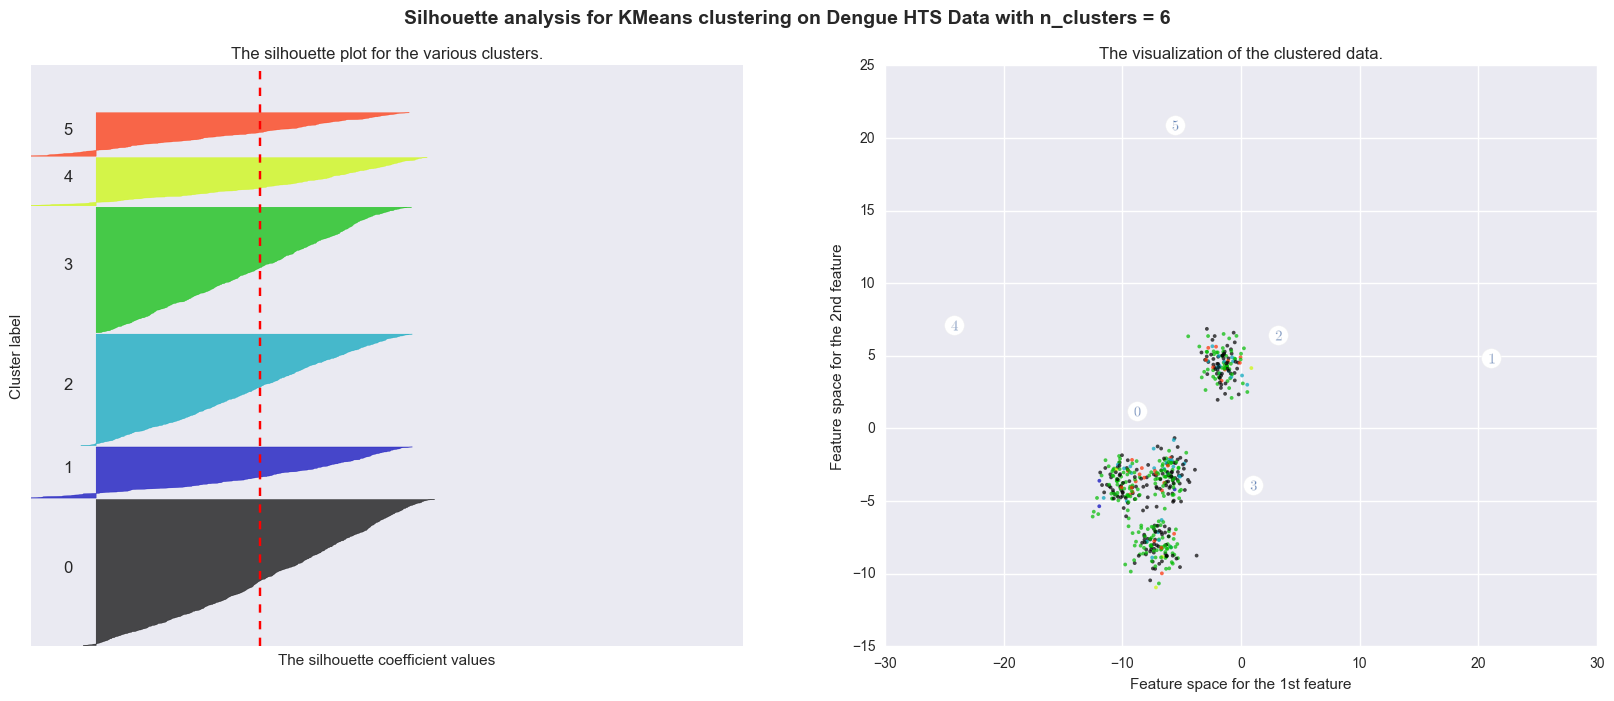

For n_clusters = 7 The average silhouette_score is : 0.246947413272


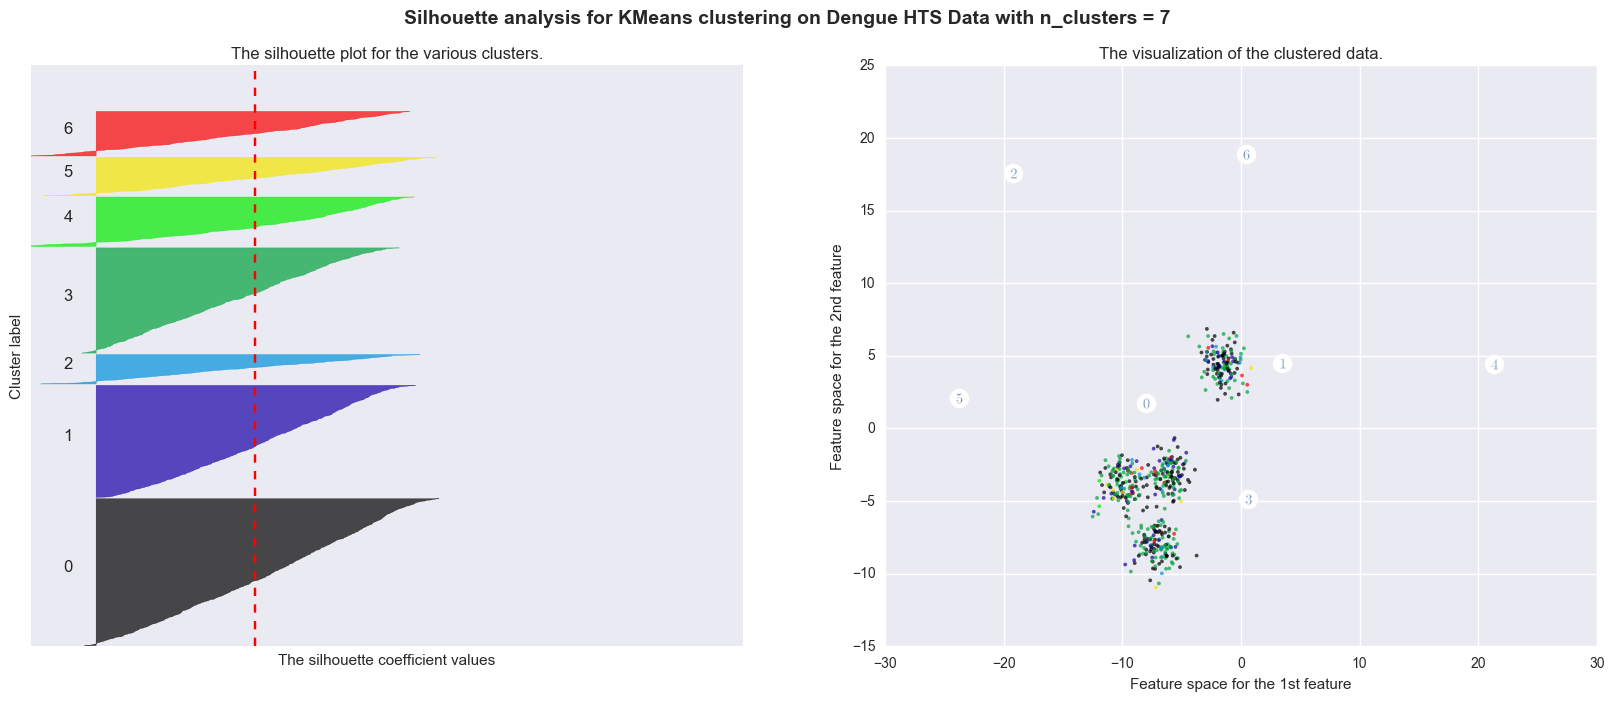

For n_clusters = 8 The average silhouette_score is : 0.238952581673


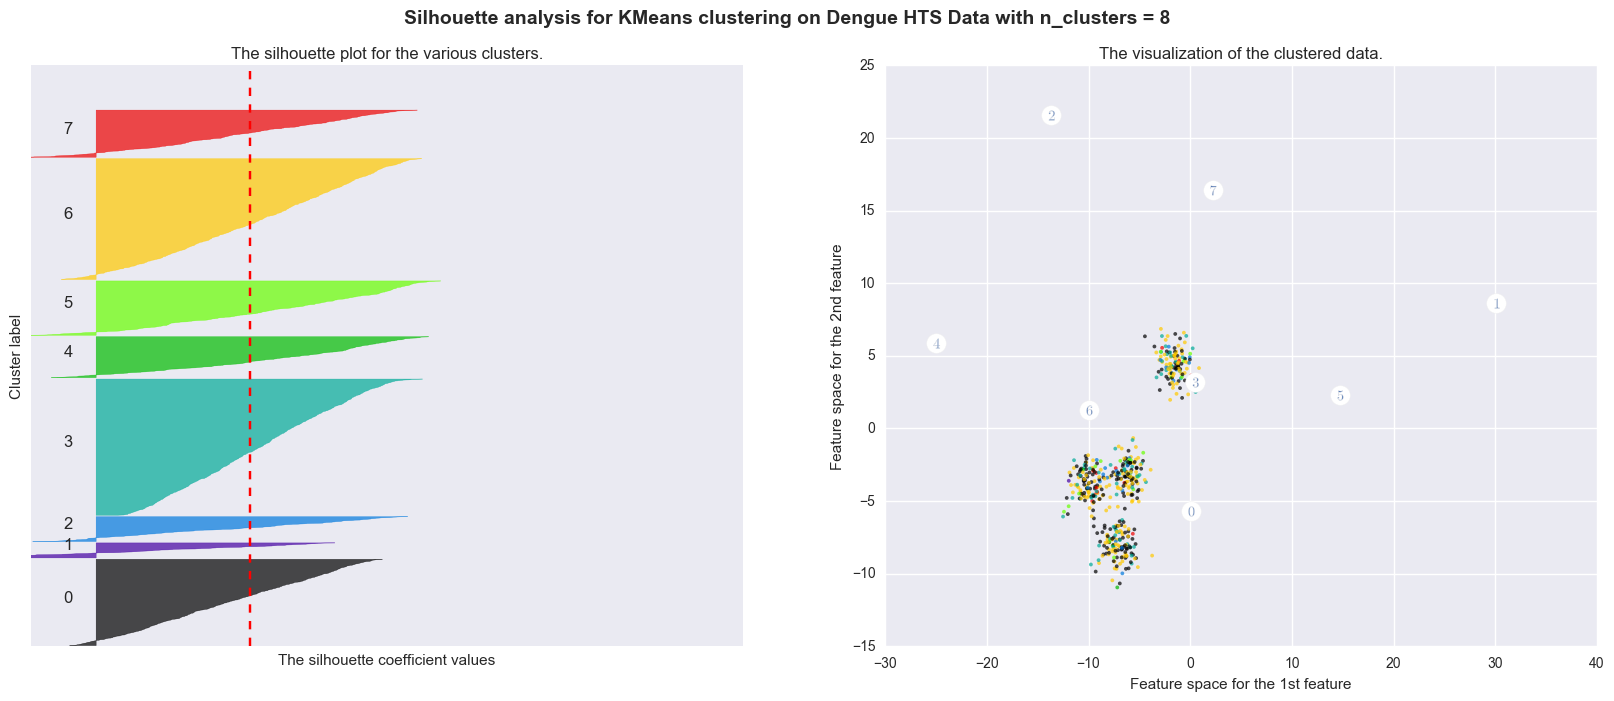

For n_clusters = 9 The average silhouette_score is : 0.229496937565


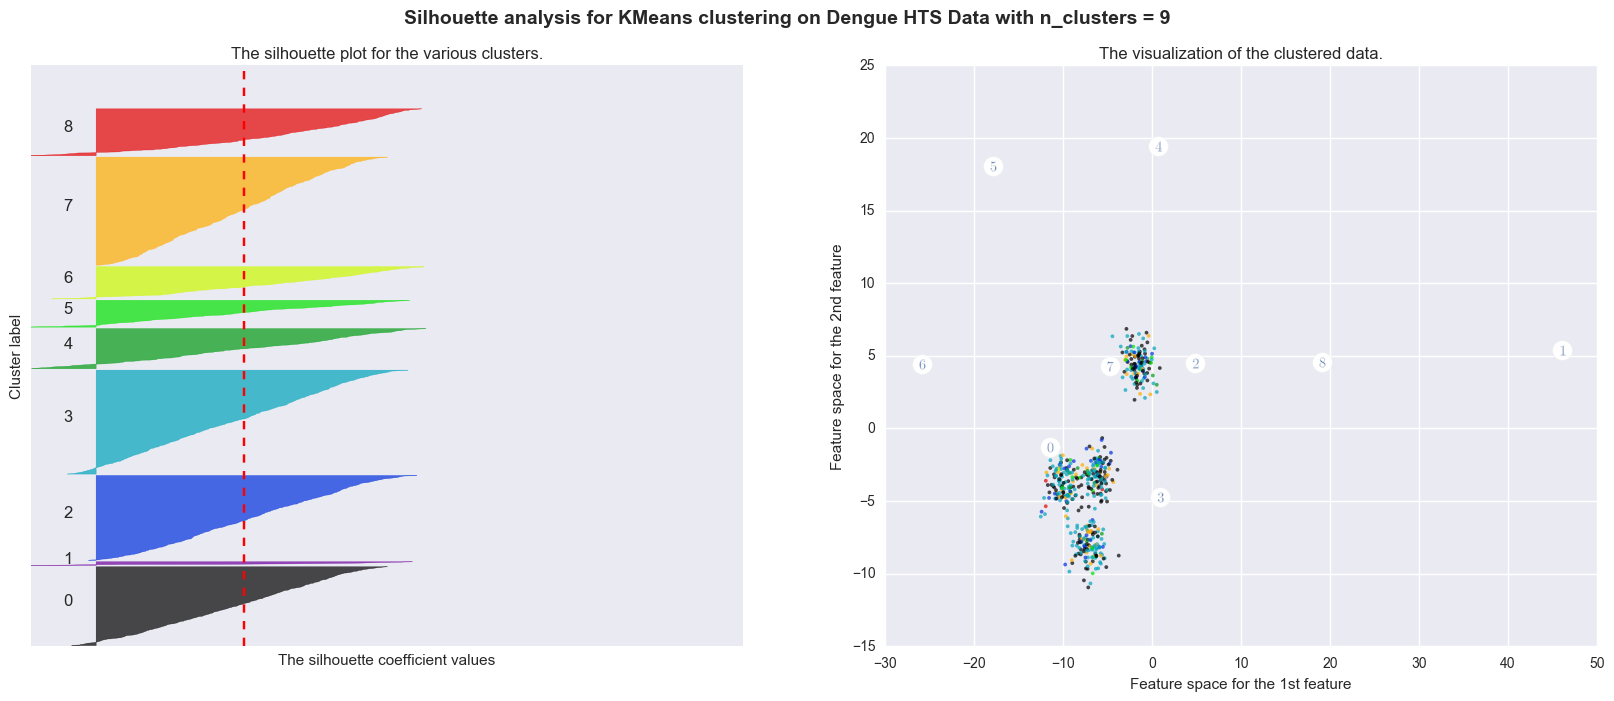

In [17]:

# K-MEANS CLUSTERING - SILHOUETTE Analysis

# Using silhoutte_score function laid out in scikit-learn,
# construct a series of silhouetter plots. By doing silhouette 
# analysis, we can study the separation distance between the 
# resulting clusters. The dataset I'll be using here is dataHTS_cols.

from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns.
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot.
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 0.5]
    ax1.set_xlim([-0.1, 1.0])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataHTS_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataHTS_cols, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataHTS_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters in screening dataset.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([])
    
    # 2nd Plot show the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered screening data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on Dengue HTS Data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

##### Based on the graphs above, the same data is plotted ten times since I specified a max 10 of n; the colors indicate the clusters created by k-means clustering, with k = 2,3,4,5,6,7,8,9,10. That is, I've forced a clustering algorithm to divide the data into 2 clusters, then 3, and so on, and colored the graph accordingly.

##### The silhouette plot shows the that the silhouette coefficient was highest when k = 4, suggesting that's the optimal number of clusters. Indeed, the plot on the right hand side show that four clusters best captures the segmentation of this data set.
